# Controller for the locking of the laser

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from GettingStarted_lib.Interface import Interface
from GettingStarted_lib.LaserLockingController import LaserLockingController
import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of GettingStarted_lib.LaserLockingController failed: Traceback (most recent call last):
  File "/home/bec3/anaconda3/envs/RP_linien_original/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/bec3/anaconda3/envs/RP_linien_original/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/home/bec3/anaconda3/envs/RP_linien_original/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/bec3/Desktop/Simone_Damian/

## Creating the interface:

It contains everything is needed for the comunications with the linien server in the RedPitaya.
- connection to the board;
- Initialization of the parameters;
- Parameters modification.

In [121]:
RP_Interface = Interface()

2025-12-04 09:53:41 - Interface - INFO - Configuration loaded from /home/bec3/Desktop/Simone_Damian/Serafini/GettingStarted_lib/connect_config.yaml:

2025-12-04 09:53:41 - Interface - INFO - Attempting connection via RedPitaya_K address (192.168.1.159:18862)


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       DEBUG    Sent authentication hash


linien_client.connection       INFO     Connection established!


2025-12-04 09:53:45 - Interface - INFO - Connected to device via RedPitaya_K address


In [59]:
pprint.pprint(vars(RP_Interface))

{'DEVICES': {'RedPitaya_K': {'ip': '192.168.1.159',
                             'linien_port': 18862,
                             'ssh_port': 22}},
 'PASSWORD': 'root',
 'USERNAME': 'root',
 'client': <linien_client.connection.LinienClient object at 0x7078b400df30>,
 'device': Device(key='dhmtcalcvf',
                  name='',
                  host='192.168.1.159',
                  port=18862,
                  username='root',
                  password='root',
                  parameters={}),
 'logger': <Logger Interface (INFO)>,
 'readable_params': {'control_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffea40>,
                     'monitor_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffc1f0>,
                     'sweep_signal': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffdc00>},
 'writeable_params': {'big_offset': <GettingStarted_lib.Interface.WriteableParameter object at 0x70

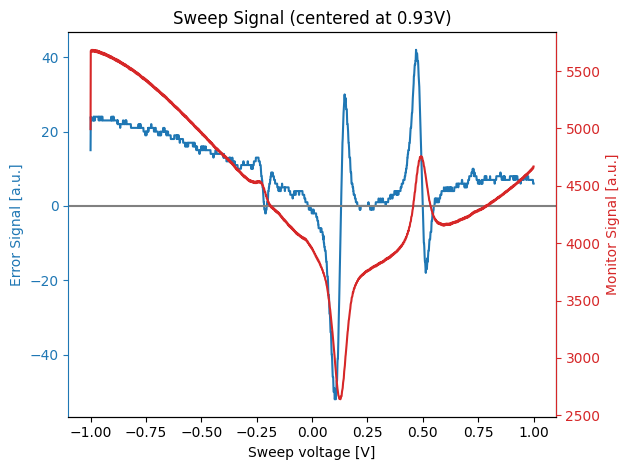

In [193]:
RP_Interface.plot_sweep()

In [188]:
RP_Interface.adjust_vertical_offset()

Actual offset_a: -75.0
New offset_a set to: -80.0


In [195]:
RP_Locking_Controller = LaserLockingController(RP_Interface)

2025-12-04 11:11:08 - LaserLockingController - INFO - LaserLockController initialized successfully.


checking lock status...
dict_keys(['x', 'error_signal', 'monitor_signal'])
Click  on the left and right sides of the target line.


KeyboardInterrupt: 

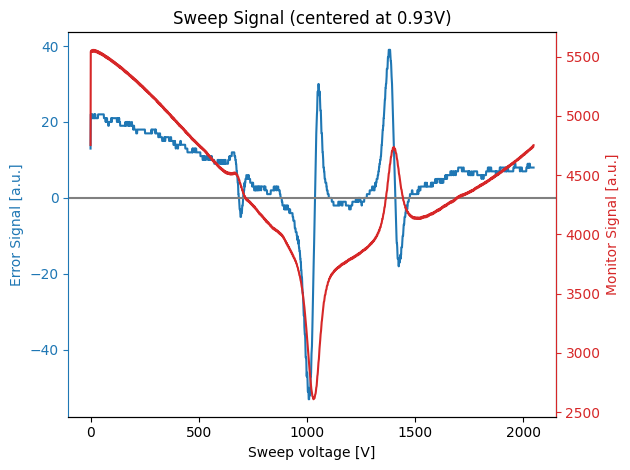

In [204]:
RP_Locking_Controller.start_manual_locking()